In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\gamezone_orders_data_cleaned.csv"
df = pd.read_csv(
    file_path,
    parse_dates=['purchase_ts_cleaned', 'ship_ts'],
    dtype={
        'purchase_year': 'Int64',
        'purchase_month': 'Int64',
        'time_to_ship': 'Int64',
        'revenue': 'float'
    },
    encoding='utf-8',
    keep_default_na=False,
    na_values=['']  # Only treat empty strings as NaN
)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   user_id                          21864 non-null  object        
 1   order_id                         21864 non-null  object        
 2   purchase_ts                      21864 non-null  object        
 3   purchase_ts_cleaned              21863 non-null  datetime64[ns]
 4   purchase_year                    21864 non-null  Int64         
 5   purchase_month                   21864 non-null  Int64         
 6   time_to_ship                     21864 non-null  Int64         
 7   ship_ts                          21864 non-null  datetime64[ns]
 8   product_name                     21864 non-null  object        
 9   product_name_cleaned             21864 non-null  object        
 10  product_id                       21864 non-null  object   

colors = ["#7B1FA2", "#0096C7", "#FF3399"]  # purple, blue, 

colors = ["#7B1FA2", "#03b2ed", "#FF3399"]  # purple, blue, pink


In [ ]:
import pandas as pd
from collections import deque

# Prepare data
df['purchase_ts_cleaned'] = pd.to_datetime(df['purchase_ts_cleaned'])
df = df.sort_values('purchase_ts_cleaned')

# Create complete daily grid
date_range = pd.date_range(
    start=df['purchase_ts_cleaned'].min().floor('D'),
    end=df['purchase_ts_cleaned'].max().floor('D'),
    freq='D'
)

daily_users = (
    df.groupby(df['purchase_ts_cleaned'].dt.floor('D'))['user_id']
    .agg(lambda x: set(x))
    .reindex(date_range, fill_value=set())
    .reset_index()
    .rename(columns={'index': 'date', 'user_id': 'user_set'})
)

# Rolling 30-day MAB (optimized)
rolling_window = deque(maxlen=30)
mab_values = []

for user_set in daily_users['user_set']:
    rolling_window.append(user_set)
    
    if len(rolling_window) < 30:
        mab_values.append(None)
    else:
        mab_values.append(len(set().union(*rolling_window)))

daily_users['monthly_active_buyers'] = mab_values

# Extract date components
daily_users['year'] = daily_users['date'].dt.year
daily_users['month_num'] = daily_users['date'].dt.month
daily_users['month_name'] = daily_users['date'].dt.strftime('%b')

# Get month-end MAB values
monthly_mab = (
    daily_users[daily_users['monthly_active_buyers'].notna()]
    .groupby(['year', 'month_num', 'month_name'], as_index=False)  # Keep month_num
    .last()
    [['year', 'month_num', 'month_name', 'monthly_active_buyers']]  # Include month_num
    .sort_values(['year', 'month_num'])  # Now it exists!
)

# Optional: Drop month_num if you don't need it in output
# monthly_mab = monthly_mab.drop(columns=['month_num'])

print(monthly_mab)

    year  month_num month_name  monthly_active_buyers
0   2019          1        Jan                  399.0
1   2019          2        Feb                  345.0
2   2019          3        Mar                  503.0
3   2019          4        Apr                  530.0
4   2019          5        May                  487.0
5   2019          6        Jun                  474.0
6   2019          7        Jul                  484.0
7   2019          8        Aug                  502.0
8   2019          9        Sep                  577.0
9   2019         10        Oct                  473.0
10  2019         11        Nov                  604.0
11  2019         12        Dec                  650.0
12  2020          1        Jan                  290.0
13  2020          2        Feb                  671.0
14  2020          3        Mar                  955.0
15  2020          4        Apr                 1183.0
16  2020          5        May                 1191.0
17  2020          6        J

In [ ]:
import pandas as pd
from collections import deque

# Prepare data
df['purchase_ts_cleaned'] = pd.to_datetime(df['purchase_ts_cleaned'])
df = df.sort_values('purchase_ts_cleaned')

# Create complete daily grid
date_range = pd.date_range(
    start=df['purchase_ts_cleaned'].min().floor('D'),
    end=df['purchase_ts_cleaned'].max().floor('D'),
    freq='D'
)

daily_users = (
    df.groupby(df['purchase_ts_cleaned'].dt.floor('D'))['user_id']
    .agg(lambda x: set(x))
    .reindex(date_range, fill_value=set())
    .reset_index()
    .rename(columns={'index': 'date', 'user_id': 'user_set'})
)

# Rolling 30-day MAB (optimized)
rolling_window = deque(maxlen=30)
mab_values = []

for user_set in daily_users['user_set']:
    rolling_window.append(user_set)
    
    if len(rolling_window) < 30:
        mab_values.append(None)
    else:
        mab_values.append(len(set().union(*rolling_window)))

daily_users['monthly_active_buyers'] = mab_values

# Extract date components
daily_users['year'] = daily_users['date'].dt.year
daily_users['month_num'] = daily_users['date'].dt.month
daily_users['month_name'] = daily_users['date'].dt.strftime('%b')

# Get month-end MAB values
monthly_mab = (
    daily_users[daily_users['monthly_active_buyers'].notna()]
    .groupby(['year', 'month_num', 'month_name'], as_index=False)  # Keep month_num
    .last()
    [['year', 'month_num', 'month_name', 'monthly_active_buyers']]  # Include month_num
    .sort_values(['year', 'month_num'])  # Now it exists!
)

# Optional: Drop month_num if you don't need it in output
# monthly_mab = monthly_mab.drop(columns=['month_num'])

print(monthly_mab)

    year  month_num month_name  monthly_active_buyers
0   2019          1        Jan                  399.0
1   2019          2        Feb                  345.0
2   2019          3        Mar                  503.0
3   2019          4        Apr                  530.0
4   2019          5        May                  487.0
5   2019          6        Jun                  474.0
6   2019          7        Jul                  484.0
7   2019          8        Aug                  502.0
8   2019          9        Sep                  577.0
9   2019         10        Oct                  473.0
10  2019         11        Nov                  604.0
11  2019         12        Dec                  650.0
12  2020          1        Jan                  290.0
13  2020          2        Feb                  671.0
14  2020          3        Mar                  955.0
15  2020          4        Apr                 1183.0
16  2020          5        May                 1191.0
17  2020          6        J

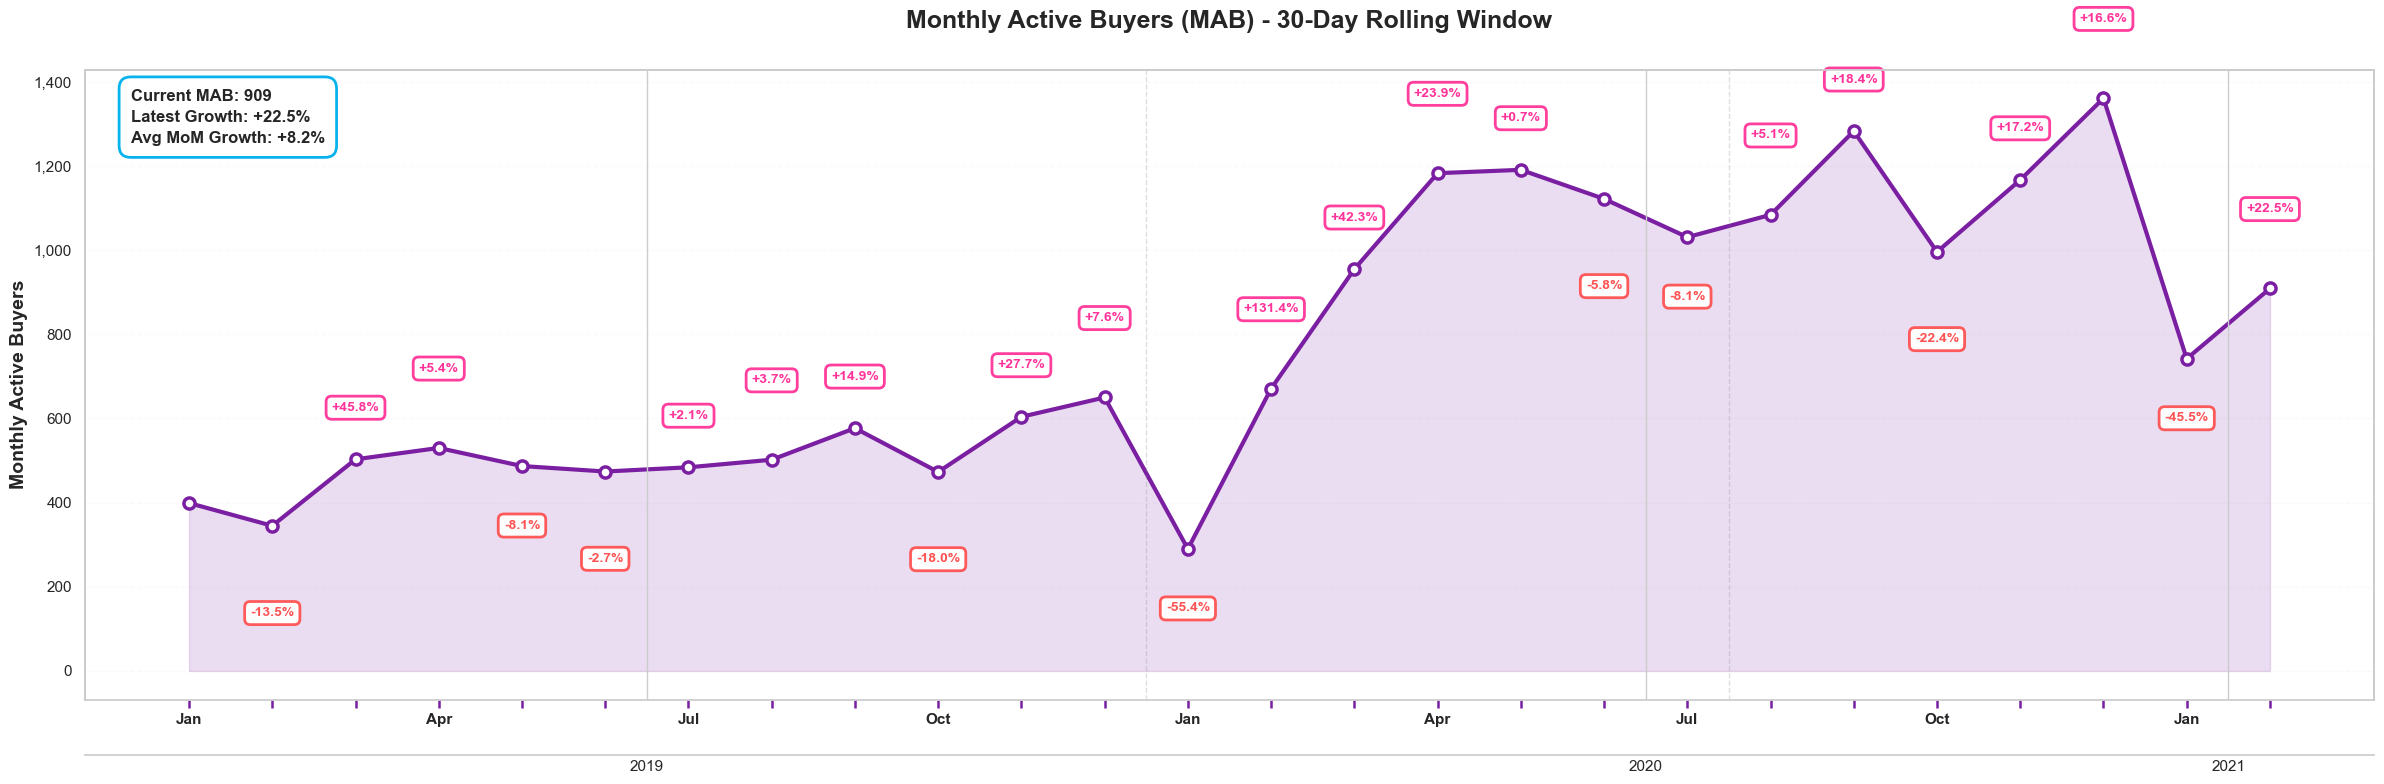

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

# Assuming you have monthly_mab DataFrame ready
# monthly_mab should have columns: ['year', 'month_num', 'month_name', 'monthly_active_buyers']

# Brand colors
colors = ["#7B1FA2", "#03b2ed", "#FF3399"]  # purple, blue, pink

# Calculate growth metrics
monthly_mab['mom_growth'] = monthly_mab['monthly_active_buyers'].pct_change() * 100

# Create quarter start labels (Jan, Apr, Jul, Oct)
def get_xtick_labels(df):
    labels = []
    for _, row in df.iterrows():
        month_num = row['month_num']
        # Show month name only at quarter starts
        labels.append(row['month_name'] if month_num in [1, 4, 7, 10] else '')
    return labels

# Get unique years for bottom labels
years_positions, years_labels = [], []
current_year = None
for i, (_, row) in enumerate(monthly_mab.iterrows()):
    if row['year'] != current_year:
        current_year = row['year']
        year_indices = [j for j, (_, r) in enumerate(monthly_mab.iterrows()) if r['year'] == current_year]
        if year_indices:
            mid_pos = (year_indices[0] + year_indices[-1]) / 2
            years_positions.append(mid_pos)
            years_labels.append(str(current_year))

# --- Plot starts here ---
fig, ax1 = plt.subplots(figsize=(24, 8), facecolor='white')
ax1.set_facecolor('white')

x = range(len(monthly_mab))
y = monthly_mab['monthly_active_buyers'].values

# Shaded area (light tone)
ax1.fill_between(x, y, alpha=0.15, color=colors[0])

# Main line
ax1.plot(
    x, y, marker='o', linewidth=3, markersize=8,
    color=colors[0], markerfacecolor='white', markeredgewidth=2.5
)

# Add MoM % labels
for i, (idx, row) in enumerate(monthly_mab.iterrows()):
    if pd.notna(row['mom_growth']):
        growth_val = row['mom_growth']
        color = colors[2] if growth_val >= 0 else '#FF5252'
        y_offset = (35 if growth_val >= 0 else -45) if i % 2 == 0 else (55 if growth_val >= 0 else -65)

        ax1.annotate(
            f"{growth_val:+.1f}%",
            xy=(i, row['monthly_active_buyers']),
            xytext=(0, y_offset),
            textcoords='offset points',
            ha='center', fontsize=10, fontweight='bold',
            color=color,
            bbox=dict(
                boxstyle='round,pad=0.4', facecolor='white',
                edgecolor=color, alpha=0.95, linewidth=2
            )
        )

# Primary x-axis: Quarter starts
ax1.set_xticks(x)
ax1.set_xticklabels(get_xtick_labels(monthly_mab), fontsize=11, fontweight='bold')
ax1.tick_params(axis='x', which='major', length=6, width=1.8, color=colors[0])

# Secondary x-axis: Years
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(years_positions)
ax2.set_xticklabels(years_labels, fontsize=13, fontweight='bold', color='#333')
ax2.xaxis.set_ticks_position('bottom')
ax2.xaxis.set_label_position('bottom')
ax2.spines['bottom'].set_position(('outward', 40))
ax2.tick_params(axis='x', which='major', length=0)

# Styling - clean white background, minimal grid
ax1.set_ylabel('Monthly Active Buyers', fontsize=14, fontweight='bold')
ax1.set_title('Monthly Active Buyers (MAB) - 30-Day Rolling Window',
              fontsize=18, fontweight='bold', pad=30)
ax1.grid(True, alpha=0.1, linestyle='--', axis='y')  # lighter, fewer grid lines
ax1.grid(False, axis='x')  # no vertical grids
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, p: f'{int(y):,}'))

# Vertical lines at year boundaries
for pos in years_positions[1:]:
    ax1.axvline(x=pos - 6, color='gray', linestyle='--', alpha=0.25, linewidth=1)

# Stats box
current_mab = monthly_mab['monthly_active_buyers'].iloc[-1]
avg_growth = monthly_mab['mom_growth'].mean()
latest_growth = monthly_mab['mom_growth'].iloc[-1] if pd.notna(monthly_mab['mom_growth'].iloc[-1]) else 0

stats_text = (
    f"Current MAB: {int(current_mab):,}\n"
    f"Latest Growth: {latest_growth:+.1f}%\n"
    f"Avg MoM Growth: {avg_growth:+.1f}%"
)

ax1.text(
    0.02, 0.97, stats_text, transform=ax1.transAxes,
    fontsize=12, verticalalignment='top',
    bbox=dict(
        boxstyle='round,pad=0.7', facecolor='white', alpha=0.98,
        edgecolor=colors[1], linewidth=2
    ),
    fontweight='bold', linespacing=1.5
)

plt.tight_layout()
plt.show()


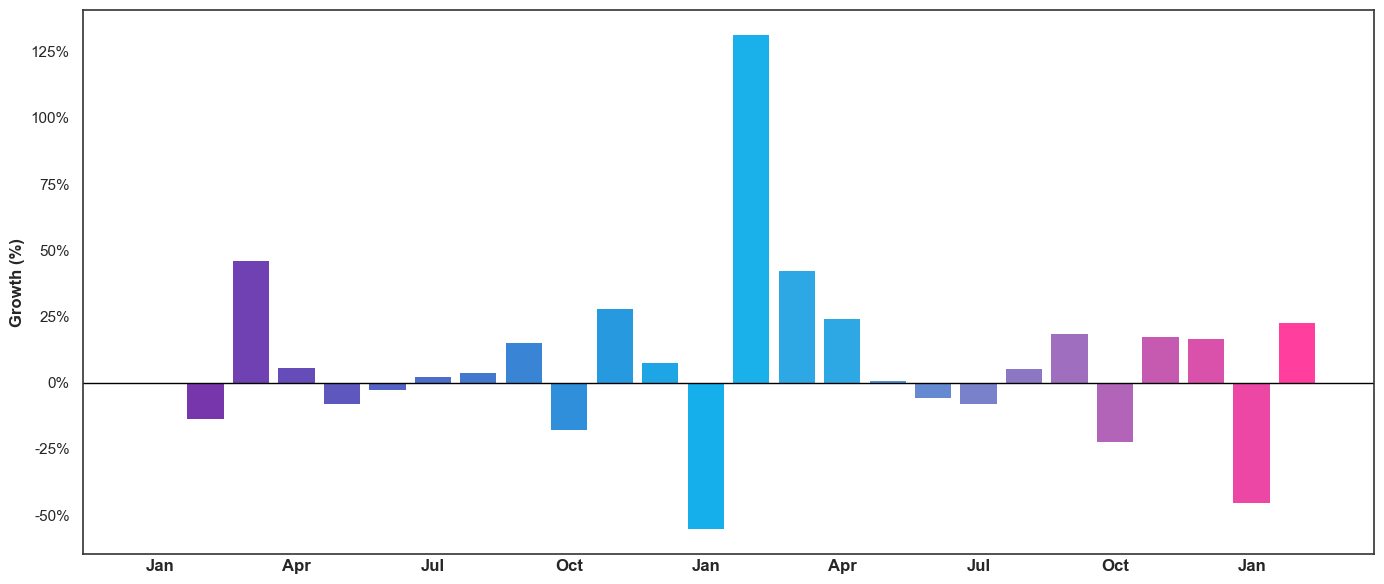

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.ticker import FuncFormatter

# Gradient colors (purple → blue → pink)
colors = ["#7B1FA2", "#03b2ed", "#FF3399"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(monthly_mab))

# Calculate Month-over-Month Growth (%)
monthly_mab['mom_growth'] = monthly_mab['monthly_active_buyers'].pct_change() * 100
monthly_mab['month_label'] = monthly_mab['month_name'] + " '" + monthly_mab['year'].astype(str).str[-2:]

# Show only the first month of each quarter
def quarterly_labels(df):
    labels = []
    for _, row in df.iterrows():
        if row['month_num'] in [1, 4, 7, 10]:
            labels.append(row['month_name'])
        else:
            labels.append('')
    return labels

# Prepare data
x = np.arange(len(monthly_mab))
y = monthly_mab['mom_growth'].fillna(0)
colors = [cmap(i / len(y)) for i in range(len(y))]

# Plot setup
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(x, y, color=colors, alpha=0.95, edgecolor='none', linewidth=0)

# Zero line
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Clean look
ax.set_xticks(x)
ax.set_xticklabels(quarterly_labels(monthly_mab), rotation=0, ha='center', fontsize=12, fontweight='bold')
ax.set_ylabel('Growth (%)', fontsize=12, fontweight='bold')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: f'{y:.0f}%'))
ax.tick_params(axis='y', labelsize=11)
ax.tick_params(axis='x', length=0)

# Remove background, grid, and clutter
ax.set_facecolor('white')
fig.patch.set_facecolor('white')
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Add clean chart outline
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(1.2)
    ax.spines[spine].set_color('#333')

# Remove chart title
ax.set_title('')

plt.tight_layout()
plt.show()


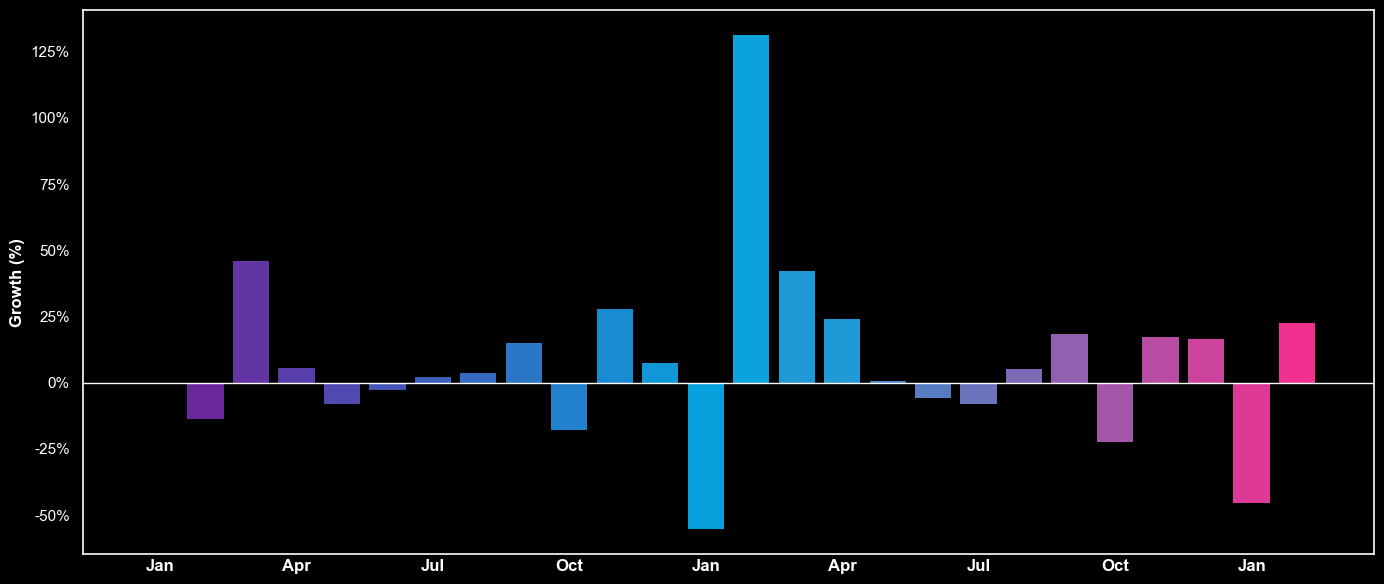

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.ticker import FuncFormatter

# Gradient colors (purple → blue → pink)
colors = ["#7B1FA2", "#03b2ed", "#FF3399"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", colors, N=len(monthly_mab))

# Calculate Month-over-Month Growth (%)
monthly_mab['mom_growth'] = monthly_mab['monthly_active_buyers'].pct_change() * 100
monthly_mab['month_label'] = monthly_mab['month_name'] + " '" + monthly_mab['year'].astype(str).str[-2:]

# Show only the first month of each quarter
def quarterly_labels(df):
    labels = []
    for _, row in df.iterrows():
        if row['month_num'] in [1, 4, 7, 10]:
            labels.append(row['month_name'])
        else:
            labels.append('')
    return labels

# Prepare data
x = np.arange(len(monthly_mab))
y = monthly_mab['mom_growth'].fillna(0)
colors = [cmap(i / len(y)) for i in range(len(y))]

# Plot setup
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(x, y, color=colors, alpha=0.95, edgecolor='none', linewidth=0)

# Zero line
ax.axhline(y=0, color='white', linestyle='-', linewidth=1)

# Clean look
ax.set_xticks(x)
ax.set_xticklabels(quarterly_labels(monthly_mab), rotation=0, ha='center', fontsize=12, fontweight='bold', color='white')
ax.set_ylabel('Growth (%)', fontsize=12, fontweight='bold', color='white')
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: f'{y:.0f}%'))
ax.tick_params(axis='y', labelsize=11, colors='white')
ax.tick_params(axis='x', length=0, colors='white')

# Remove background, grid, and clutter
ax.set_facecolor('black')
fig.patch.set_facecolor('black')
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Add clean chart outline
for spine in ['top', 'bottom', 'left', 'right']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(1.2)
    ax.spines[spine].set_color('white')

# Remove chart title
ax.set_title('')

plt.tight_layout()
plt.show()


In [45]:
import pandas as pd

# Assuming df is your cleaned orders dataframe
# Ensure purchase_ts_cleaned is datetime
df['purchase_ts_cleaned'] = pd.to_datetime(df['purchase_ts_cleaned'])

# 1️⃣ Create a cohort column — first purchase month per user
first_purchase = (
    df.groupby('user_id')['purchase_ts_cleaned']
    .min()
    .dt.to_period('M')
    .rename('cohort')
)

df = df.join(first_purchase, on='user_id')

# 2️⃣ Count purchases per user
user_purchase_counts = df.groupby('user_id')['order_id'].nunique().rename('purchase_count')

# 3️⃣ Merge back with cohort info
user_data = df[['user_id', 'cohort']].drop_duplicates().merge(user_purchase_counts, on='user_id')

# 4️⃣ Calculate repeat purchase rate per cohort
rpr = (
    user_data.groupby('cohort')
    .apply(lambda x: (x['purchase_count'] >= 2).mean() * 100)
    .reset_index(name='repeat_purchase_rate_%')
)

# 5️⃣ Sort and clean for display
rpr['cohort'] = rpr['cohort'].astype(str)
rpr = rpr.sort_values('cohort').reset_index(drop=True)

print(rpr)


     cohort  repeat_purchase_rate_%
0   2019-01               14.797136
1   2019-02                5.345912
2   2019-03                4.280156
3   2019-04                4.406130
4   2019-05                3.434343
5   2019-06                3.640257
6   2019-07               13.078471
7   2019-08               11.284047
8   2019-09               19.366197
9   2019-10                5.010438
10  2019-11               14.020270
11  2019-12               19.908815
12  2020-01               12.631579
13  2020-02                3.291536
14  2020-03                2.564103
15  2020-04                3.889369
16  2020-05                2.350966
17  2020-06                3.187614
18  2020-07                7.714286
19  2020-08               10.488246
20  2020-09               16.025641
21  2020-10                3.093812
22  2020-11               10.157618
23  2020-12               19.304734
24  2021-01               31.241473
25  2021-02                0.240964


C:\Users\shaif\AppData\Local\Temp\ipykernel_16968\452118629.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['purchase_count'] >= 2).mean() * 100)


In [49]:
# Save rpr DataFrame to Excel
rpr.to_excel("repeat_purchase_rate.xlsx", index=False)



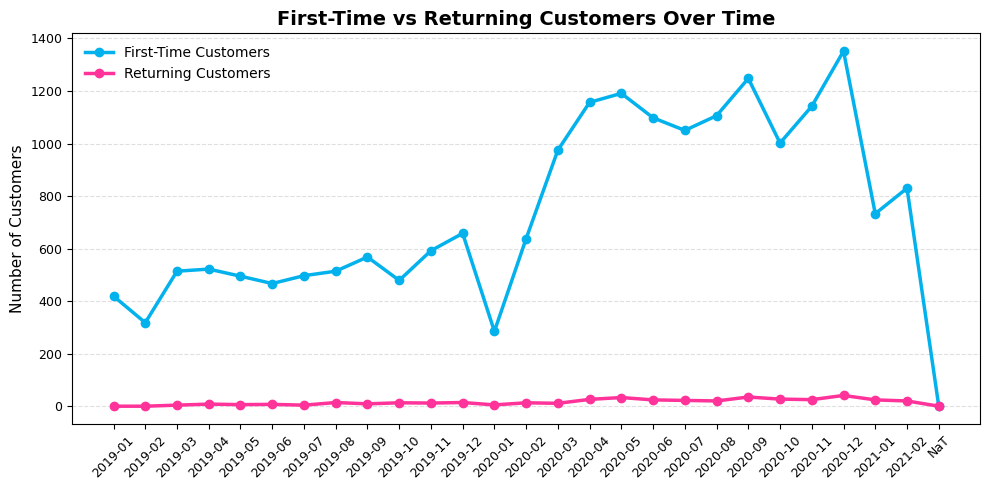

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure purchase date is datetime
df['purchase_ts_cleaned'] = pd.to_datetime(df['purchase_ts_cleaned'])

# Extract Year-Month for grouping
df['year_month'] = df['purchase_ts_cleaned'].dt.to_period('M').astype(str)

# Get each user's first purchase month
first_purchase = (
    df.groupby('user_id')['purchase_ts_cleaned']
    .min()
    .dt.to_period('M')
    .astype(str)
    .rename('first_purchase_month')
)
df = df.join(first_purchase, on='user_id')

# Label customers per order as 'New' or 'Returning'
df['customer_type'] = df.apply(
    lambda x: 'New' if x['year_month'] == x['first_purchase_month'] else 'Returning',
    axis=1
)

# Count unique users by type per month
customer_counts = (
    df.groupby(['year_month', 'customer_type'])['user_id']
    .nunique()
    .reset_index(name='customer_count')
)

# Pivot for line chart
pivot = customer_counts.pivot(index='year_month', columns='customer_type', values='customer_count').fillna(0)

# --- 🎨 Visualization ---
plt.figure(figsize=(10,5))
plt.plot(pivot.index, pivot['New'], color="#03b2ed", linewidth=2.5, marker='o', label='First-Time Customers')
plt.plot(pivot.index, pivot['Returning'], color="#FF3399", linewidth=2.5, marker='o', label='Returning Customers')

# Style tweaks
plt.title("First-Time vs Returning Customers Over Time", fontsize=14, weight='bold')
plt.xlabel("")
plt.ylabel("Number of Customers", fontsize=11)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


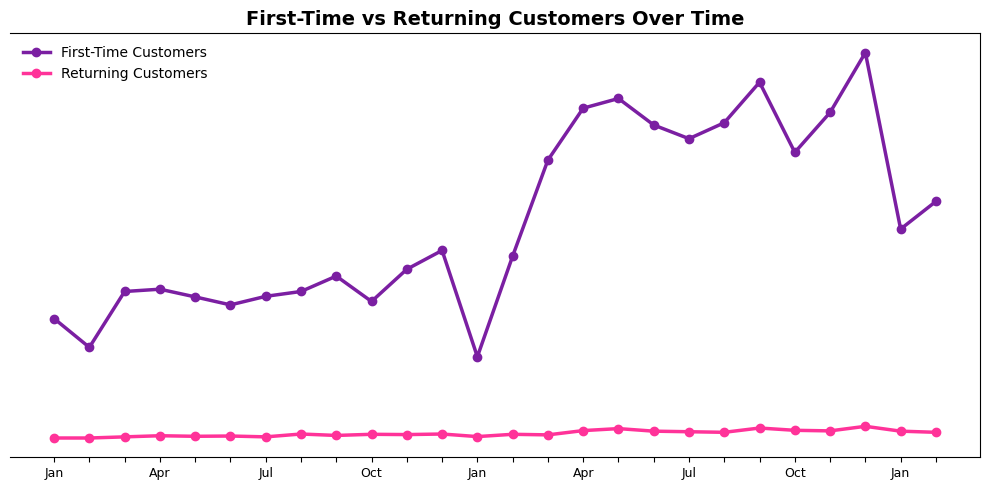

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure purchase date is datetime
df['purchase_ts_cleaned'] = pd.to_datetime(df['purchase_ts_cleaned'])

# Extract Year-Month for grouping
df['year_month'] = df['purchase_ts_cleaned'].dt.to_period('M').astype(str)

# Get each user's first purchase month
first_purchase = (
    df.groupby('user_id')['purchase_ts_cleaned']
    .min()
    .dt.to_period('M')
    .astype(str)
    .rename('first_purchase_month')
)

# Remove the column if it already exists, then join
if 'first_purchase_month' in df.columns:
    df = df.drop('first_purchase_month', axis=1)
    
df = df.join(first_purchase, on='user_id')

# Label customers per order as 'New' or 'Returning'
df['customer_type'] = df.apply(
    lambda x: 'New' if x['year_month'] == x['first_purchase_month'] else 'Returning',
    axis=1
)

# Count unique users by type per month
customer_counts = (
    df.groupby(['year_month', 'customer_type'])['user_id']
    .nunique()
    .reset_index(name='customer_count')
)

# Pivot for line chart
pivot = customer_counts.pivot(index='year_month', columns='customer_type', values='customer_count').fillna(0)

# --- 🎨 Visualization ---
plt.figure(figsize=(10,5))
plt.plot(pivot.index, pivot['New'], color="#7B1FA2", linewidth=2.5, marker='o', label='First-Time Customers')
plt.plot(pivot.index, pivot['Returning'], color="#FF3399", linewidth=2.5, marker='o', label='Returning Customers')

# Style tweaks
plt.title("First-Time vs Returning Customers Over Time", fontsize=14, weight='bold')
plt.xlabel("")

# Create custom x-axis labels showing only first month of each quarter
x_labels = []
prev_quarter = None
for ym in pivot.index:
    year, month = ym.split('-')
    quarter = (int(month) - 1) // 3 + 1
    current_quarter = f"{year}-Q{quarter}"
    
    if current_quarter != prev_quarter:
        # First month of the quarter - show abbreviated month name
        month_name = pd.to_datetime(ym).strftime('%b')
        x_labels.append(month_name)
        prev_quarter = current_quarter
    else:
        x_labels.append('')

plt.xticks(range(len(pivot.index)), x_labels, rotation=0, fontsize=9)
plt.yticks([])  # Remove y-axis ticks
plt.gca().spines['left'].set_visible(False)  # Remove y-axis line
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

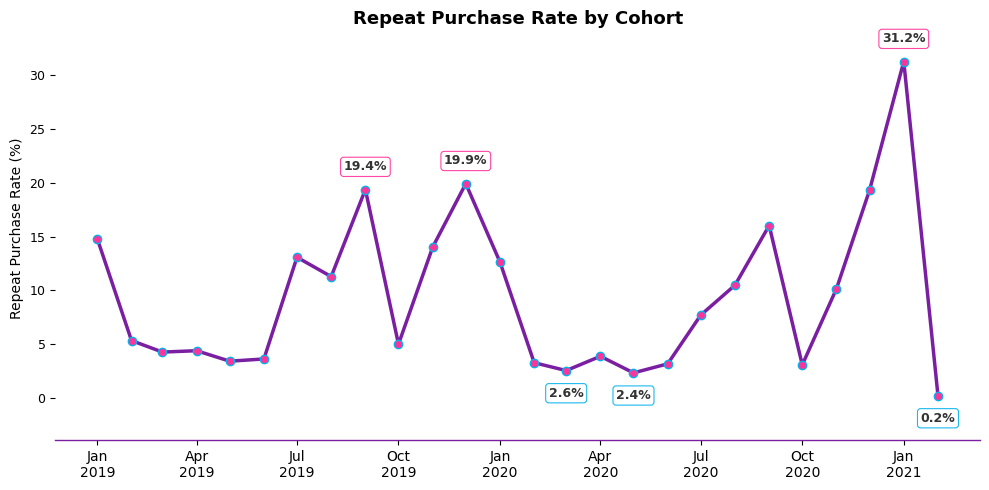

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime and sort
rpr['cohort'] = pd.to_datetime(rpr['cohort'], format='%Y-%m')
rpr = rpr.sort_values('cohort')

# Identify top 3 and bottom 3
top3 = rpr.nlargest(3, 'repeat_purchase_rate_%')
bottom3 = rpr.nsmallest(3, 'repeat_purchase_rate_%')

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')

# Continuous line
ax.plot(
    rpr['cohort'],
    rpr['repeat_purchase_rate_%'],
    color="#7B1FA2",
    linewidth=2.5,
    marker='o',
    markerfacecolor="#FF3399",
    markeredgecolor="#03b2ed"
)

# --- Quarter-based ticks ---
quarter_ticks = rpr[rpr['cohort'].dt.month.isin([1, 4, 7, 10])]
ax.set_xticks(quarter_ticks['cohort'])
ax.set_xticklabels(
    [f"{m}\n{y}" for m, y in zip(
        quarter_ticks['cohort'].dt.strftime('%b'),
        quarter_ticks['cohort'].dt.strftime('%Y')
    )],
    fontsize=9
)

# --- Highlight labels ---
for _, row in top3.iterrows():
    ax.text(
        row['cohort'],
        row['repeat_purchase_rate_%'] + 1.5,
        f"{row['repeat_purchase_rate_%']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color="#333333",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#FF3399", lw=0.8, alpha=0.9)
    )

for _, row in bottom3.iterrows():
    ax.text(
        row['cohort'],
        row['repeat_purchase_rate_%'] - 1.5,
        f"{row['repeat_purchase_rate_%']:.1f}%",
        ha='center',
        va='top',
        fontsize=9,
        fontweight='bold',
        color="#333333",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#03b2ed", lw=0.8, alpha=0.9)
    )

# --- Styling ---
ax.set_title("Repeat Purchase Rate by Cohort", fontsize=13, fontweight='bold', pad=15)
ax.set_xlabel("")
ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=10)
ax.tick_params(axis='y', labelsize=9)
ax.grid(False)

# Hide outline
for spine in ax.spines.values():
    spine.set_visible(False)

# --- Lower the x-axis line (step below the chart) ---
ax.spines['bottom'].set_position(('outward', 20))  # moves x-axis 20px lower
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color("#7B1FA2")
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()


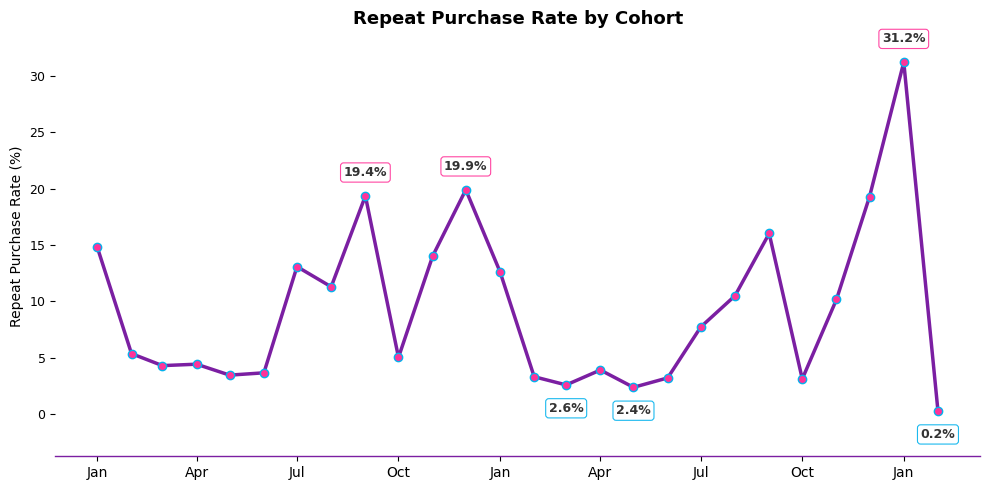

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure datetime and sort
rpr['cohort'] = pd.to_datetime(rpr['cohort'], format='%Y-%m')
rpr = rpr.sort_values('cohort')

# Identify top 3 and bottom 3
top3 = rpr.nlargest(3, 'repeat_purchase_rate_%')
bottom3 = rpr.nsmallest(3, 'repeat_purchase_rate_%')

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white')

# Continuous line
ax.plot(
    rpr['cohort'],
    rpr['repeat_purchase_rate_%'],
    color="#7B1FA2",
    linewidth=2.5,
    marker='o',
    markerfacecolor="#FF3399",
    markeredgecolor="#03b2ed"
)

# --- Quarter-based ticks ---
quarter_ticks = rpr[rpr['cohort'].dt.month.isin([1, 4, 7, 10])]
ax.set_xticks(quarter_ticks['cohort'])
ax.set_xticklabels(
    [m for m in quarter_ticks['cohort'].dt.strftime('%b')],
    fontsize=9
)

# --- Highlight labels ---
for _, row in top3.iterrows():
    ax.text(
        row['cohort'],
        row['repeat_purchase_rate_%'] + 1.5,
        f"{row['repeat_purchase_rate_%']:.1f}%",
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color="#333333",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#FF3399", lw=0.8, alpha=0.9)
    )

for _, row in bottom3.iterrows():
    ax.text(
        row['cohort'],
        row['repeat_purchase_rate_%'] - 1.5,
        f"{row['repeat_purchase_rate_%']:.1f}%",
        ha='center',
        va='top',
        fontsize=9,
        fontweight='bold',
        color="#333333",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="#03b2ed", lw=0.8, alpha=0.9)
    )

# --- Styling ---
ax.set_title("Repeat Purchase Rate by Cohort", fontsize=13, fontweight='bold', pad=15)
ax.set_xlabel("")
ax.set_ylabel("Repeat Purchase Rate (%)", fontsize=10)
ax.tick_params(axis='y', labelsize=9)
ax.grid(False)

# Hide outline
for spine in ax.spines.values():
    spine.set_visible(False)

# --- Lower the x-axis line (step below the chart) ---
ax.spines['bottom'].set_position(('outward', 20))  # moves x-axis 20px lower
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_color("#7B1FA2")
ax.spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()
